# Name : Jeeva K

# Task 01

# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Predict the percentage of an student based on the no. of study hours.

# Importing all libraries required

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

# Loading Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Checking the types of data

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Shape of dataset

In [6]:
data.shape

(25, 2)

# Check the missing value

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Statistical details of the dataset

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Finding all the column names inside the dataset

In [9]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

# Number of distinct observations

In [10]:
data.nunique()

Hours     23
Scores    23
dtype: int64

# Keys in the dataset

In [11]:
data.keys()

Index(['Hours', 'Scores'], dtype='object')

In [12]:
type(data)

pandas.core.frame.DataFrame

# Check the dataset for duplicate element

In [13]:
data.duplicated().sum()

0

# Correlation of dataset

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Covariance of dataset

In [15]:
data.cov()

,Hours,Scores
Hours,6.3761,62.331500
Scores,62.3315,639.426667


# Find the Series containing counts of unique values

In [16]:
data.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
dtype: int64

# Visualization using Scatter plot

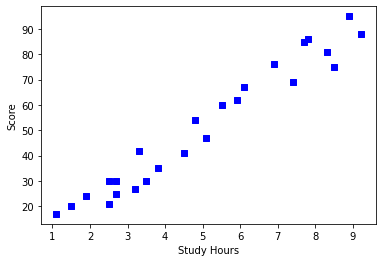

In [17]:
X = data['Hours']
Y = data['Scores']
plt.xlabel('Study Hours')
plt.ylabel("Score")
plt.scatter(X,Y,color='blue',marker='s')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [18]:
x = data.iloc[:, :-1]
y = data.iloc[:, 1] 

In [19]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [21]:
x.shape

(25, 1)

In [22]:
y.shape

(25,)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# Splitting Data into Test and Train

In [23]:
from sklearn.model_selection import train_test_split  
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0) 

In [24]:
xtrain.shape

(20, 1)

In [25]:
xtest.shape

(5, 1)

In [26]:
ytrain.shape

(20,)

In [27]:
ytest.shape

(5,)

# Training the Algorithm

In [28]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(xtrain, ytrain) 

print("Training complete")

Training complete


In [29]:
model

LinearRegression()

In [30]:
model.coef_

array([9.91065648])

In [31]:
model.intercept_

2.018160041434662

In [32]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

line

,Hours
0,26.794801
1,52.562508
2,33.732261
3,86.258740
4,36.705458
5,16.884145
6,93.196200
7,56.526771
8,84.276609
9,28.776933


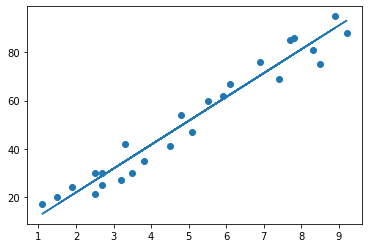

In [33]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [34]:
#print(xtest) # Testing data - In Hours
y_pred = model.predict(xtest) # Predicting the scores

In [35]:
xtest

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [36]:
ytest

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [37]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [38]:
y_pred.shape

(5,)

In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [157]:
model.predict([[9.25]])

array([93.69173249])

In [40]:
# You can also test with your own data
hours = [[9.25]]
y_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [40]:
from sklearn.metrics import r2_score, mean_squared_error
print("Accuracy is: ", r2_score(ytest,y_pred))

Accuracy is:  0.9454906892105354


In [42]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [47]:
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred)) 

Mean Squared Error: 21.598769307217456
